In [199]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [200]:
house_data = fetch_california_housing()
X = house_data.data
Y = house_data.target
feature_names = house_data.feature_names
target_names = house_data.target_names
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [201]:
df = pd.DataFrame(np.hstack([X, Y.reshape(-1, 1)]), columns=feature_names+target_names)
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [202]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


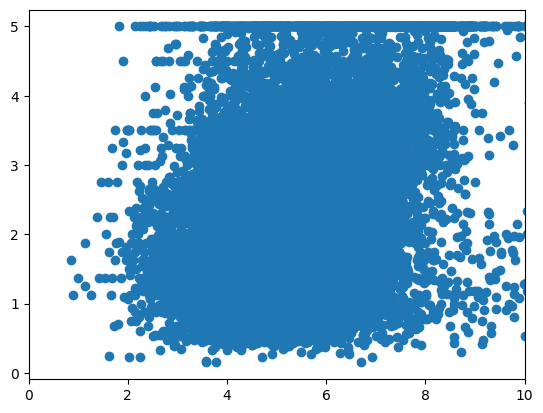

In [203]:
idx = feature_names.index("AveRooms")
plt.scatter(X[:, idx], Y)
plt.xlim((0, 10))
plt.show()

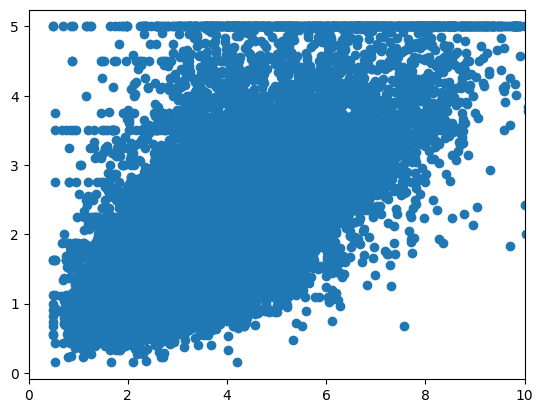

In [204]:
idx = feature_names.index("MedInc")
plt.scatter(X[:, idx], Y)
plt.xlim((0, 10))
plt.show()

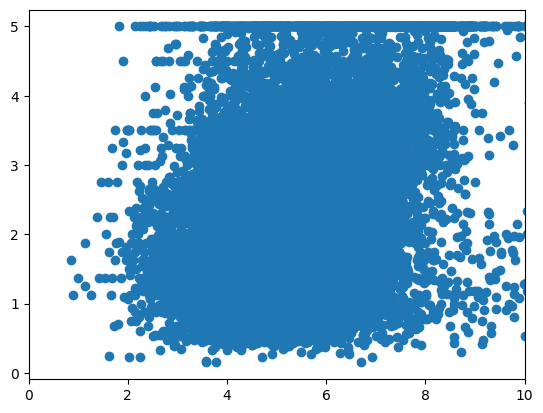

In [205]:
idx = feature_names.index("AveRooms")
plt.scatter(X[:, idx], Y)
plt.xlim((0, 10))
plt.show()

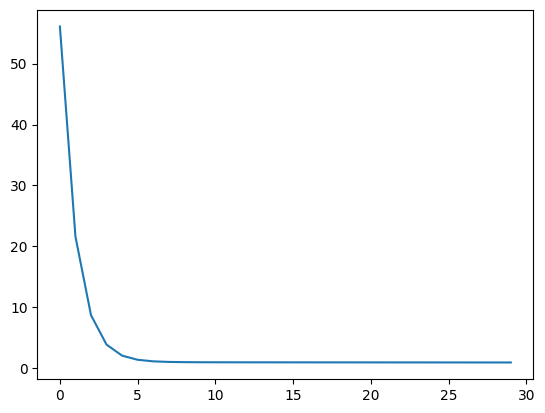

In [206]:
weights = torch.tensor(-1, dtype=torch.float32, requires_grad=True)
biases = torch.tensor(-1, dtype=torch.float32, requires_grad=True)

def forward(X):
    return weights * X + biases

def loss(prediction, Y):
    return torch.mean((prediction - Y) ** 2)

X_med = torch.tensor(X[ :, feature_names.index('MedInc')]).reshape(-1, 1)
Y = torch.tensor(Y).reshape(-1, 1)

losses = []
for i in range(30):
    pred = forward(X_med)
    l = loss(pred, Y)
    l.backward()

    weights.data = weights.data - 0.01 * weights.grad.data
    biases.data = biases.data - 0.01 * biases.grad.data

    weights.grad.data.zero_()
    biases.grad.data.zero_()

    losses.append(l.item())

plt.plot(losses)

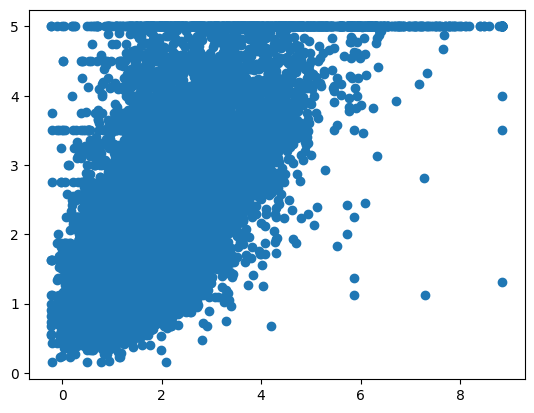

In [210]:
predictions = forward(X_med)
plt.scatter(predictions.detach().numpy(), Y.detach().numpy())